데이터 로드 및 확인

In [24]:
import pandas as pd

data = pd.read_csv('../crawling/articles_total_20180101_741.csv', parse_dates=['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    741 non-null    object
 1   date     741 non-null    object
 2   content  741 non-null    object
dtypes: object(3)
memory usage: 17.5+ KB


이상치 제거

In [25]:
# data['date'] = data['date'].map(lambda x: pd.to_datetime(x))
#DateParseError: year 1894202102 is out of range: 1894202102, at position 0 -> date 이상치 행 제거 필요

print(f"이상치 제거 전: {data.shape[0]}행")
# 잘못된 값이 들어간 행 삭제
data.drop(index= data[data['date'] == '1894202102'].index, inplace=True)
print(f"이상치 제거 후: {data.shape[0]}행")

이상치 제거 전: 741행
이상치 제거 후: 740행


In [26]:
# date 컬럼 형 변환 (object -> datetime)
data['date'] = data['date'].map(lambda x: pd.to_datetime(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 740
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    740 non-null    object        
 1   date     740 non-null    datetime64[ns]
 2   content  740 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.1+ KB


In [27]:
data.head()

,title,date,content
0,전남 '솔라시도' 에 스마트 시티 본격 조성 기대감,2018-01-11,문재인 대통령이 2018년 신년사에서 스마트 시티 조성을 언급함에 따라 전남 해남 ...
1,"""미래 농업경쟁력 핵심은 빅데이터""",2018-01-22,"【 앵커멘트 】 4차 산업혁명 시대, 농업도 예외가 아니죠. 과거엔 농업하면 시설이..."
2,"""미래 농업경쟁력 핵심은 빅데이터""",2018-01-23,"【 앵커멘트 】 4차 산업혁명 시대, 농업도 예외가 아니죠. 과거엔 농업하면 시설이..."
3,[스마트시티 도래②]미래투자vs역할제한..정부·업계 '시각차',2018-05-29,김현미 국토교통부 장관이 25일 서울 수서역 인근 스마트시티 홍보관 '더 스마티움'...
4,경북도 '스마트시티 경북현장적용 모델개발' 용역 최종 보고회,2018-07-25,[이임태 기자(=안동)] 경상북도는 지난 24일 ICT융복합 기술을 활용하여 도시문...


### 특정 기간 기사 발행량 추이 살펴 보기

연 기준

In [28]:
count_by_year = data.groupby(pd.Grouper(key="date", axis=0, freq="y"))['content'].count()
count_by_year

date
2018-12-31     51
2019-12-31     32
2020-12-31    130
2021-12-31    188
2022-12-31    192
2023-12-31    147
Freq: A-DEC, Name: content, dtype: int64

In [29]:
# 2018-12-31 -> 2018년 으로 변환
count_by_year.index = count_by_year.index.map(lambda x : f"{str(x).split('-')[0]}년")
count_by_year

date
2018년     51
2019년     32
2020년    130
2021년    188
2022년    192
2023년    147
Name: content, dtype: int64

월 기준

In [30]:
count_by_month = data.groupby(pd.Grouper(key="date", axis=0, freq="m"))['content'].count()
count_by_month

date
2018-01-31     5
2018-02-28     0
2018-03-31     3
2018-04-30     4
2018-05-31     1
              ..
2023-05-31    14
2023-06-30     5
2023-07-31     5
2023-08-31    12
2023-09-30    19
Freq: M, Name: content, Length: 69, dtype: int64

In [31]:
# 2018-1-31 -> 2018년 01월 변환
count_by_month.index = count_by_month.index.map(lambda x : f"{str(x).split('-')[0]}년 {str(x).split('-')[1]}월")
count_by_month

date
2018년 01월     5
2018년 02월     0
2018년 03월     3
2018년 04월     4
2018년 05월     1
             ..
2023년 05월    14
2023년 06월     5
2023년 07월     5
2023년 08월    12
2023년 09월    19
Name: content, Length: 69, dtype: int64

주 기준

In [32]:
count_by_week = data.groupby(pd.Grouper(key="date", axis=0, freq="w-sat"))['content'].count()
count_by_week

date
2018-01-13    3
2018-01-20    0
2018-01-27    2
2018-02-03    0
2018-02-10    0
             ..
2023-09-02    1
2023-09-09    4
2023-09-16    6
2023-09-23    5
2023-09-30    4
Freq: W-SAT, Name: content, Length: 299, dtype: int64

In [33]:
# 2018-1-13 -> 2018년 01월 변환
count_by_week.index = count_by_week.index.map(lambda x : f"{str(x).split('-')[0]}년 {str(x).split('-')[1]}월")
count_by_week

date
2018년 01월    3
2018년 01월    0
2018년 01월    2
2018년 02월    0
2018년 02월    0
            ..
2023년 09월    1
2023년 09월    4
2023년 09월    6
2023년 09월    5
2023년 09월    4
Name: content, Length: 299, dtype: int64

---
시각화

- barplot

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프 그리는 함수 생성
def plot_bar(data, xlabel, ylabel, title, figsize=(12, 4)):
    plt.rc('font', family='Malgun Gothic')
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=data.index, y=data.values, palette='crest') # color='green'
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(title)
    plt.xticks(rotation=360)  
    plt.show()

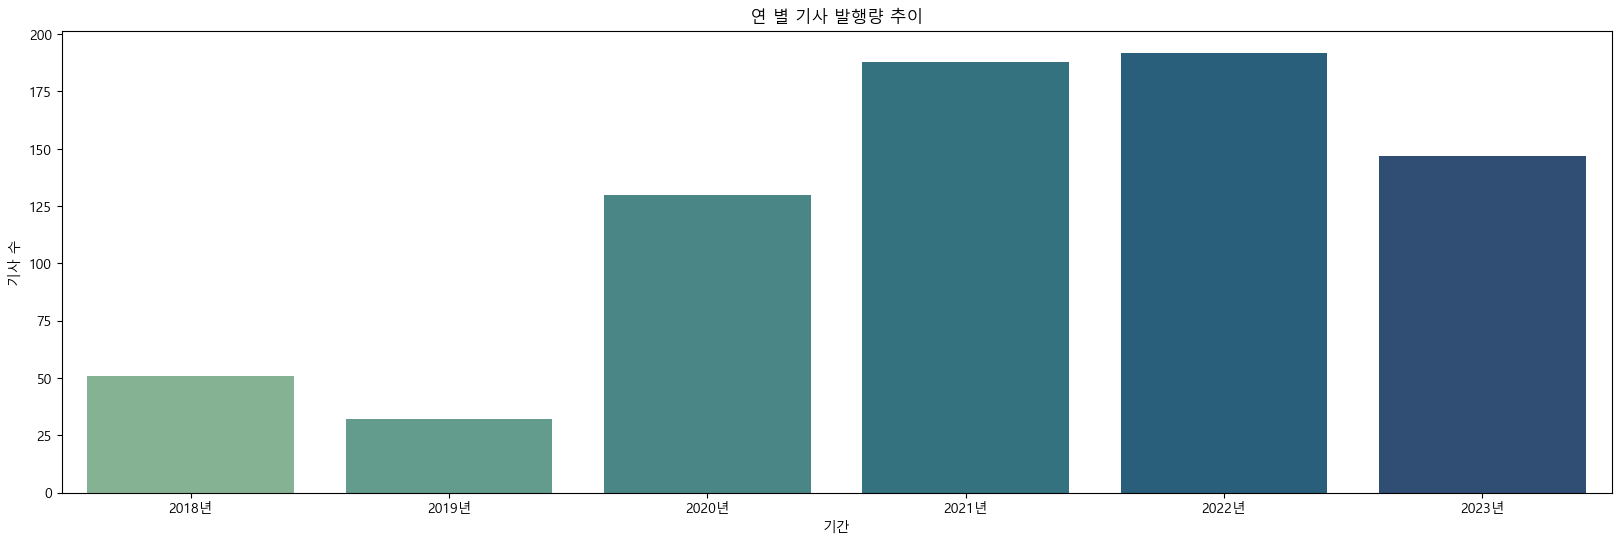

In [48]:
plot_bar(count_by_year, '기간', '기사 수', '연 별 기사 발행량 추이', (20, 6))

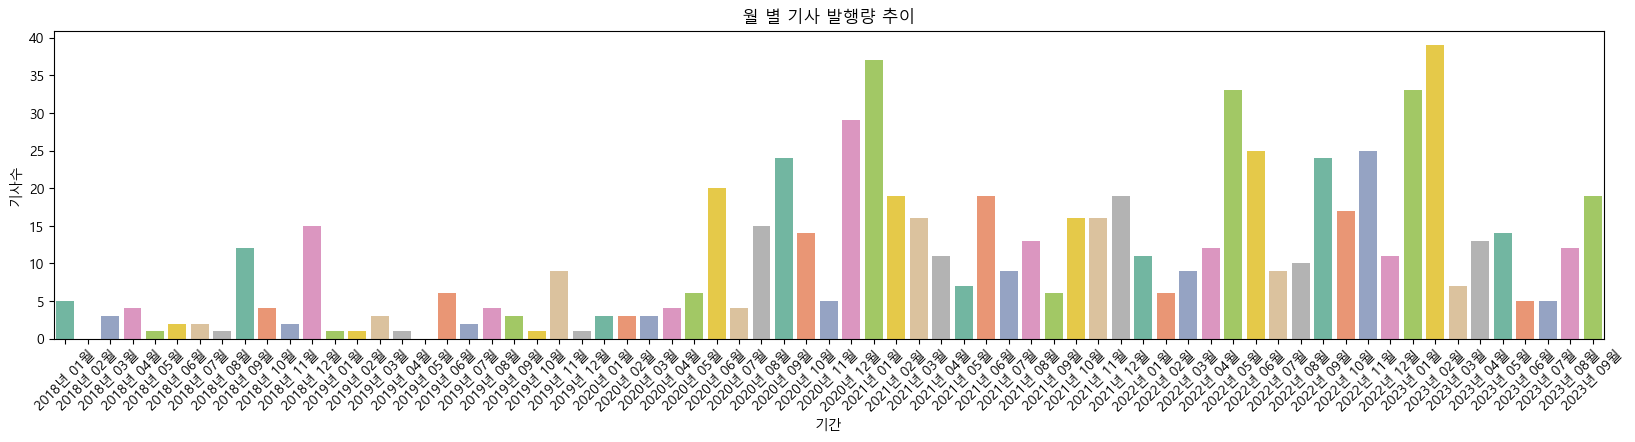

In [20]:
plot_bar(count_by_month, '기간', '기사수', '월 별 기사 발행량 추이', (20, 4))

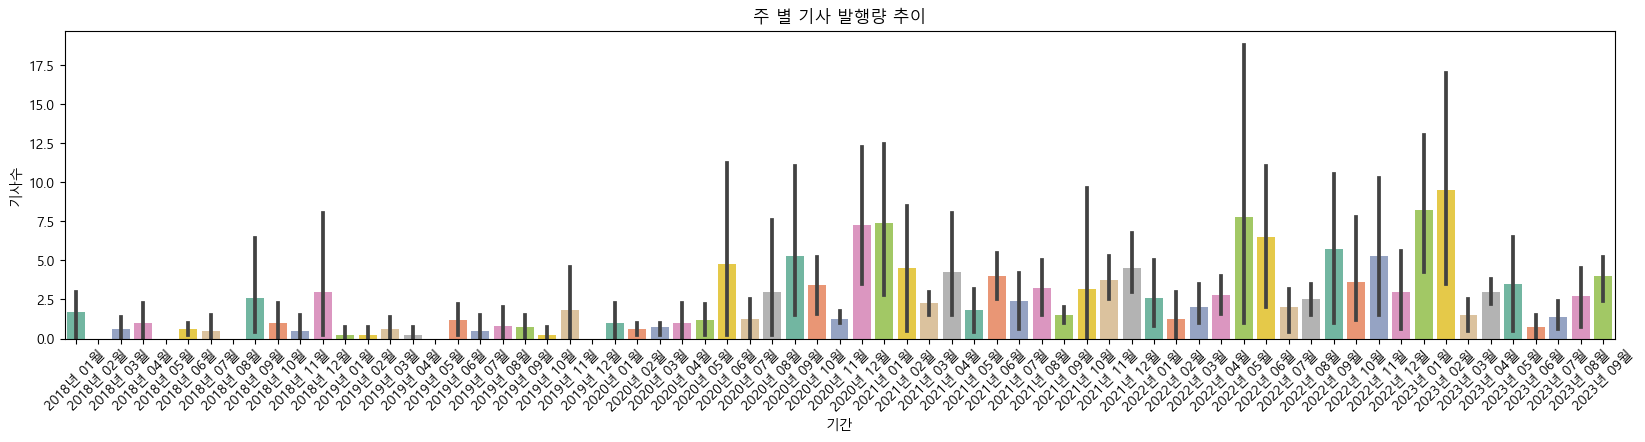

In [21]:
plot_bar(count_by_week, '기간', '기사수', '주 별 기사 발행량 추이', (20, 4))

- regplot

In [40]:
count_by_month.to_frame().reset_index()

,date,content
0,2018년 01월,5
1,2018년 02월,0
2,2018년 03월,3
3,2018년 04월,4
4,2018년 05월,1
...,...,...
64,2023년 05월,14
65,2023년 06월,5
66,2023년 07월,5
67,2023년 08월,12


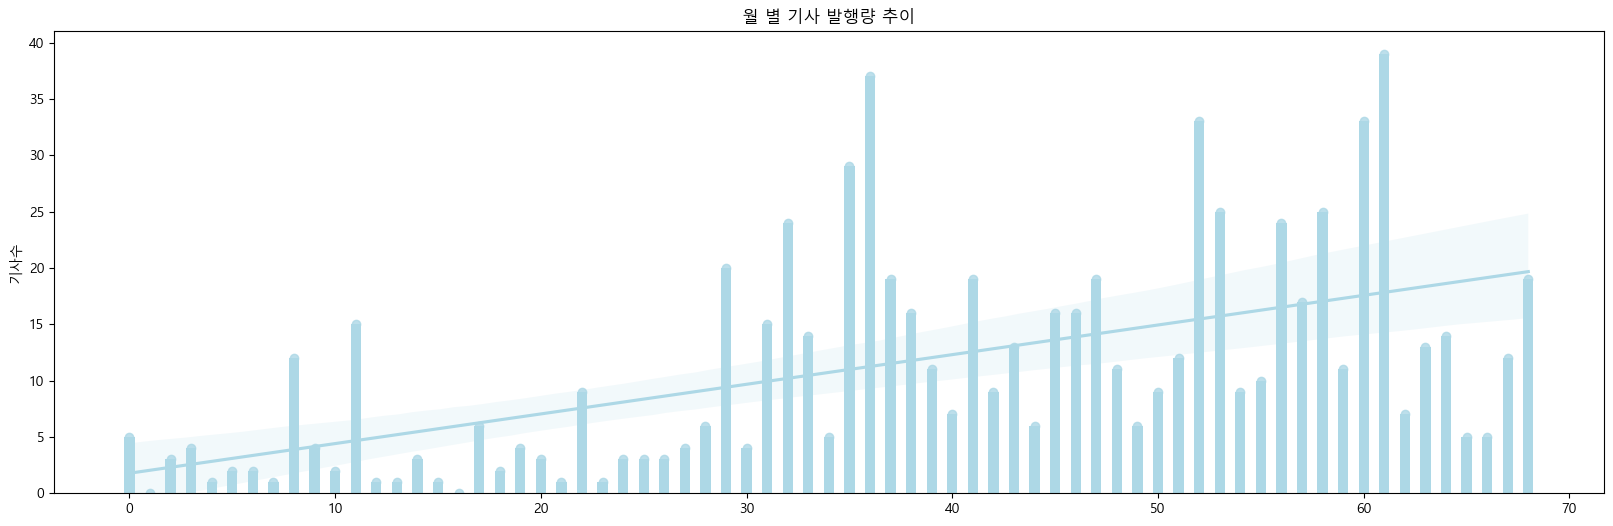

In [42]:
import numpy as np; np.random.seed(1)
import seaborn as sns
import matplotlib.pyplot as plt

x = [*range(69)]
y = count_by_month.to_frame().reset_index()['content']

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(x,y, width=0.5, color="lightblue", zorder=0)
sns.regplot(x=x, y=y, ax=ax, color='lightblue')
ax.set_title('월 별 기사 발행량 추이')
ax.set_ylabel('기사수')
ax.set_ylim(0, None)
plt.show()

- line graph

In [19]:
import plotly.express as px
fig = px.line(count_by_month, y=count_by_month.values)
fig.show()